In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/aggregated_llm_perf.csv')

<Axes: ylabel='Frequency'>

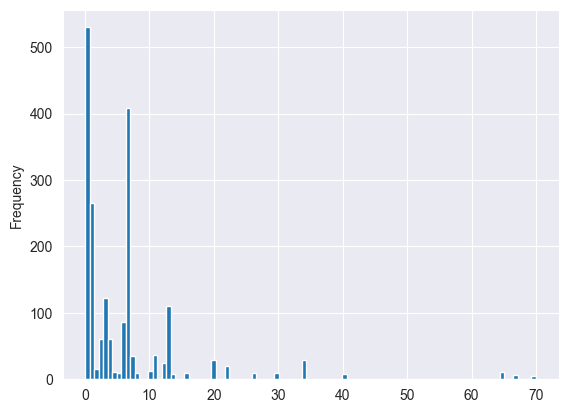

In [16]:
df.parameters_count.plot.hist(bins=100)

In [40]:
sub = df[
    (df['parameters_count'] >= 7) &
    (df['dtype'] == 'float16') &
    (df['gpu'] == 'NVIDIA A100-SXM4-80GB') &
    (df['optimization'].isna()) &
    (~df['quantization'].isin(['bnb-8bit', 'bnb-4bit'])) &
    (~df.quantization.isna())
]

In [41]:
len(sub)

268

<Axes: xlabel='parameters_count', ylabel='energy_per_token'>

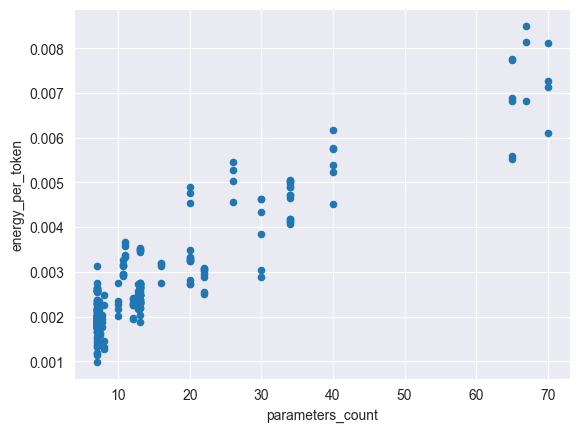

In [42]:
sub.plot(x='parameters_count', y='energy_per_token', kind='scatter')

In [43]:
sub.to_csv('./data/llm_perf_filtered.csv')